## Problem statement

Employees are the most important part of an organization. Successful employees meet deadlines, make sales, and build the brand through positive customer interactions.
Employee attrition is a major cost to an organization and predicting such attritions is the most important requirement of the Human Resources department in many organizations. In this problem, your task is to predict the attrition rate of employees of an organization. 

### Data

- Train.csv
- Test.csv
- sample_submission.csv

**Variable Description** 

|Column Name|Description|
|-----|-----|
Employee_ID|Unique ID of each employee
Age|Age of each employee
Unit|Department under which the employee work
Education|Rating of Qualification of an employee (1-5)
Gender|Male-0 or Female-1
Decision_skill_possess|Decision skill that an employee possesses
Post_Level|Level of the post in an organization (1-5)
Relationship_Status|Categorical Married or Single 
Pay_Scale|Rate in between 1 to 10
Time_of_service|Years in the organization
growth_rate|Growth rate in percentage of an employee
Time_since_promotion|Time in years since the last promotion
Work_Life_balance|Rating for work-life balance given by an employee.
Travel_Rate|Rating based on travel history(1-3)
Hometown|Name of the city
Compensation_and_Benefits|Categorical Variabe
VAR1 - VAR5|Anominised variables
Attrition_rate(TARGET VARIABLE)|Attrition rate of each employee

### Evaluation criteria

#### The evaluation metric that is used for this problem is the root mean squared error. The formula is as follows:
 score = 100 * max(0,1 - root_mean_squared_error(actual_values,predicted_values))


## Importing necessary libraries

In [1]:
import warnings
from pandas_profiling import ProfileReport
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
warnings.filterwarnings('ignore')

### Loading Data Modelling Libraries

In [2]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE, SelectKBest
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
pd.set_option('display.max_columns', None)

## DATA LOADING AND CLEANING

### Load and Prepare Dataset

In [3]:
# Loading the train and test dataset
data_train = pd.read_csv(
    r'C:\Users\sumir\Downloads\HackerEarth_MachineLearning\Train.csv',
    delimiter=',')
data_test = pd.read_csv(
    r'C:\Users\sumir\Downloads\HackerEarth_MachineLearning\Test.csv',
    delimiter=',')

print('Shape of the data is: ', data_train.shape)
print('Shape of the data is: ', data_test.shape)

Shape of the data is:  (7000, 24)
Shape of the data is:  (3000, 23)


In [4]:
# Displaying top 5 rows of the train dataset
data_train.head()

Employee_ID Gender   Age  Education_Level Relationship_Status     Hometown  \
0   EID_23371      F  42.0                4             Married     Franklin   
1   EID_18000      M  24.0                3              Single  Springfield   
2    EID_3891      F  58.0                3             Married      Clinton   
3   EID_17492      F  26.0                3              Single      Lebanon   
4   EID_22534      F  31.0                1             Married  Springfield   

                        Unit Decision_skill_possess  Time_of_service  \
0                         IT             Conceptual              4.0   
1                  Logistics             Analytical              5.0   
2                    Quality             Conceptual             27.0   
3  Human Resource Management             Behavioral              4.0   
4                  Logistics             Conceptual              5.0   

   Time_since_promotion  growth_rate  Travel_Rate  Post_Level  Pay_Scale  \
0                     4           33            1           1        7.0   
1                     4           36            0           3        6.0   
2                     3           51            0           2        8.0   
3                     3           56            1           3        8.0   
4                     4           62            1           3        2.0   

  Compensation_and_Benefits  Work_Life_balance  VAR1    VAR2    VAR3  VAR4  \
0                     type2                3.0     4  0.7516  1.8688   2.0   
1                     type2                4.0     3 -0.9612 -0.4537   2.0   
2                     type2                1.0     4 -0.9612 -0.4537   3.0   
3                     type2                1.0     3 -1.8176 -0.4537   NaN   
4                     type3                3.0     1  0.7516 -0.4537   2.0   

   VAR5  VAR6  VAR7  Attrition_rate  
0     4     5     3          0.1841  
1     3     5     3          0.0670  
2     3     8     3          0.0851  
3     3     7     3          0.0668  
4     2     8     2          0.1827

In [5]:
# Displaying last 5 rows of the train dataset
data_train.tail()

Employee_ID Gender   Age  Education_Level Relationship_Status  \
6995   EID_16328      F  23.0                5             Married   
6996    EID_8387      F  44.0                1             Married   
6997    EID_8077      F  49.0                3              Single   
6998   EID_19597      F  47.0                3             Married   
6999    EID_1640      F  58.0                3             Married   

         Hometown        Unit Decision_skill_possess  Time_of_service  \
6995     Franklin  Operarions             Behavioral              4.0   
6996      Lebanon         R&D             Analytical             16.0   
6997  Springfield          IT              Directive             10.0   
6998   Washington       Sales             Behavioral             24.0   
6999     Franklin          IT              Directive             22.0   

      Time_since_promotion  growth_rate  Travel_Rate  Post_Level  Pay_Scale  \
6995                     1           20            1           2        6.0   
6996                     2           59            0           2        4.0   
6997                     1           59            1           2        3.0   
6998                     1           21            1           5        8.0   
6999                     2           74            0           4        5.0   

     Compensation_and_Benefits  Work_Life_balance  VAR1    VAR2    VAR3  VAR4  \
6995                     type3                3.0     1  0.7516 -0.4537   2.0   
6996                     type3                3.0     2 -0.1048 -2.7762   2.0   
6997                     type2                4.0     2 -0.1048 -0.4537   2.0   
6998                     type0                2.0     4  0.7516  1.8688   2.0   
6999                     type2                3.0     3 -0.1048 -1.6150   3.0   

      VAR5  VAR6  VAR7  Attrition_rate  
6995     3     7     3          0.7839  
6996     4     8     4          0.1055  
6997     4     8     3          0.7847  
6998     3     6     3          0.4162  
6999     4     5     3          0.0910

In [6]:
profile_train = ProfileReport(data_train, title="Training data report")
profile_train

In [7]:
# Description of dataset
data_train.describe()

Age  Education_Level  Time_of_service  Time_since_promotion  \
count  6588.000000      7000.000000      6856.000000           7000.000000   
mean     39.622799         3.187857        13.385064              2.367143   
std      13.606920         1.065102        10.364188              1.149395   
min      19.000000         1.000000         0.000000              0.000000   
25%      27.000000         3.000000         5.000000              1.000000   
50%      37.000000         3.000000        10.000000              2.000000   
75%      52.000000         4.000000        21.000000              3.000000   
max      65.000000         5.000000        43.000000              4.000000   

       growth_rate  Travel_Rate   Post_Level    Pay_Scale  Work_Life_balance  \
count  7000.000000  7000.000000  7000.000000  6991.000000        6989.000000   
mean     47.064286     0.817857     2.798000     6.006294           2.387895   
std      15.761406     0.648205     1.163721     2.058435           1.122786   
min      20.000000     0.000000     1.000000     1.000000           1.000000   
25%      33.000000     0.000000     2.000000     5.000000           1.000000   
50%      47.000000     1.000000     3.000000     6.000000           2.000000   
75%      61.000000     1.000000     3.000000     8.000000           3.000000   
max      74.000000     2.000000     5.000000    10.000000           5.000000   

              VAR1         VAR2         VAR3         VAR4         VAR5  \
count  7000.000000  6423.000000  7000.000000  6344.000000  7000.000000   
mean      3.098571    -0.008126    -0.013606     1.891078     2.834143   
std       0.836377     0.989850     0.986933     0.529403     0.938945   
min       1.000000    -1.817600    -2.776200     1.000000     1.000000   
25%       3.000000    -0.961200    -0.453700     2.000000     2.000000   
50%       3.000000    -0.104800    -0.453700     2.000000     3.000000   
75%       3.000000     0.751600     0.707500     2.000000     3.000000   
max       5.000000     1.608100     1.868800     3.000000     5.000000   

              VAR6         VAR7  Attrition_rate  
count  7000.000000  7000.000000     7000.000000  
mean      7.101286     3.257000        0.189376  
std       1.164262     0.925319        0.185753  
min       5.000000     1.000000        0.000000  
25%       6.000000     3.000000        0.070400  
50%       7.000000     3.000000        0.142650  
75%       8.000000     4.000000        0.235000  
max       9.000000     5.000000        0.995900

In [8]:
# Information about the dataset
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
Employee_ID                  7000 non-null object
Gender                       7000 non-null object
Age                          6588 non-null float64
Education_Level              7000 non-null int64
Relationship_Status          7000 non-null object
Hometown                     7000 non-null object
Unit                         7000 non-null object
Decision_skill_possess       7000 non-null object
Time_of_service              6856 non-null float64
Time_since_promotion         7000 non-null int64
growth_rate                  7000 non-null int64
Travel_Rate                  7000 non-null int64
Post_Level                   7000 non-null int64
Pay_Scale                    6991 non-null float64
Compensation_and_Benefits    7000 non-null object
Work_Life_balance            6989 non-null float64
VAR1                         7000 non-null int64
VAR2                         6423 non-null fl

In [9]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
Employee_ID                  3000 non-null object
Gender                       3000 non-null object
Age                          2839 non-null float64
Education_Level              3000 non-null int64
Relationship_Status          3000 non-null object
Hometown                     3000 non-null object
Unit                         3000 non-null object
Decision_skill_possess       3000 non-null object
Time_of_service              2948 non-null float64
Time_since_promotion         3000 non-null int64
growth_rate                  3000 non-null int64
Travel_Rate                  3000 non-null int64
Post_Level                   3000 non-null int64
Pay_Scale                    2997 non-null float64
Compensation_and_Benefits    3000 non-null object
Work_Life_balance            2995 non-null float64
VAR1                         3000 non-null int64
VAR2                         2783 non-null fl

In [10]:
data_train.drop_duplicates()

Employee_ID Gender   Age  Education_Level Relationship_Status  \
0      EID_23371      F  42.0                4             Married   
1      EID_18000      M  24.0                3              Single   
2       EID_3891      F  58.0                3             Married   
3      EID_17492      F  26.0                3              Single   
4      EID_22534      F  31.0                1             Married   
...          ...    ...   ...              ...                 ...   
6995   EID_16328      F  23.0                5             Married   
6996    EID_8387      F  44.0                1             Married   
6997    EID_8077      F  49.0                3              Single   
6998   EID_19597      F  47.0                3             Married   
6999    EID_1640      F  58.0                3             Married   

         Hometown                       Unit Decision_skill_possess  \
0        Franklin                         IT             Conceptual   
1     Springfield                  Logistics             Analytical   
2         Clinton                    Quality             Conceptual   
3         Lebanon  Human Resource Management             Behavioral   
4     Springfield                  Logistics             Conceptual   
...           ...                        ...                    ...   
6995     Franklin                 Operarions             Behavioral   
6996      Lebanon                        R&D             Analytical   
6997  Springfield                         IT              Directive   
6998   Washington                      Sales             Behavioral   
6999     Franklin                         IT              Directive   

      Time_of_service  Time_since_promotion  growth_rate  Travel_Rate  \
0                 4.0                     4           33            1   
1                 5.0                     4           36            0   
2                27.0                     3           51            0   
3                 4.0                     3           56            1   
4                 5.0                     4           62            1   
...               ...                   ...          ...          ...   
6995              4.0                     1           20            1   
6996             16.0                     2           59            0   
6997             10.0                     1           59            1   
6998             24.0                     1           21            1   
6999             22.0                     2           74            0   

      Post_Level  Pay_Scale Compensation_and_Benefits  Work_Life_balance  \
0              1        7.0                     type2                3.0   
1              3        6.0                     type2                4.0   
2              2        8.0                     type2                1.0   
3              3        8.0                     type2                1.0   
4              3        2.0                     type3                3.0   
...          ...        ...                       ...                ...   
6995           2        6.0                     type3                3.0   
6996           2        4.0                     type3                3.0   
6997           2        3.0                     type2                4.0   
6998           5        8.0                     type0                2.0   
6999           4        5.0                     type2                3.0   

      VAR1    VAR2    VAR3  VAR4  VAR5  VAR6  VAR7  Attrition_rate  
0        4  0.7516  1.8688   2.0     4     5     3          0.1841  
1        3 -0.9612 -0.4537   2.0     3     5     3          0.0670  
2        4 -0.9612 -0.4537   3.0     3     8     3          0.0851  
3        3 -1.8176 -0.4537   NaN     3     7     3          0.0668  
4        1  0.7516 -0.4537   2.0     2     8     2          0.1827  
...    ...     ...     ...   ...   ...   ...   ...             ...  
6995     1  0.7516 -0.4537   2.0     3

In [11]:
data_test.drop_duplicates()

Employee_ID Gender   Age  Education_Level Relationship_Status  \
0      EID_22713      F  32.0                5              Single   
1       EID_9658      M  65.0                2              Single   
2      EID_22203      M  52.0                3             Married   
3       EID_7652      M  50.0                5              Single   
4       EID_6516      F  44.0                3             Married   
...          ...    ...   ...              ...                 ...   
2995   EID_22547      F  32.0                3              Single   
2996   EID_10066      F   NaN                2              Single   
2997    EID_7126      F  60.0                4              Single   
2998    EID_4929      F  51.0                1             Married   
2999   EID_24750      F  45.0                1              Single   

         Hometown       Unit Decision_skill_possess  Time_of_service  \
0     Springfield        R&D             Conceptual              7.0   
1         Lebanon         IT              Directive             41.0   
2     Springfield      Sales              Directive             21.0   
3      Washington  Marketing             Analytical             11.0   
4        Franklin        R&D             Conceptual             12.0   
...           ...        ...                    ...              ...   
2995     Franklin      Sales              Directive              3.0   
2996     Franklin  Marketing             Conceptual             10.0   
2997      Lebanon  Logistics             Analytical             35.0   
2998  Springfield         IT             Behavioral             23.0   
2999     Franklin      Sales              Directive             12.0   

      Time_since_promotion  growth_rate  Travel_Rate  Post_Level  Pay_Scale  \
0                        4           30            1           5        4.0   
1                        2           72            1           1        1.0   
2                        3           25            0           1        8.0   
3                        4           28            1           1        2.0   
4                        4           47            1           3        2.0   
...                    ...          ...          ...         ...        ...   
2995                     3           38            1           3        6.0   
2996                     2           57            1           4        9.0   
2997                     1           69            0           2        9.0   
2998                     1           30            0           2        6.0   
2999                     4           70            1           2        8.0   

     Compensation_and_Benefits  Work_Life_balance  VAR1    VAR2    VAR3  VAR4  \
0                        type2                1.0     3 -0.9612 -0.4537   2.0   
1                        type2                1.0     4 -0.9612  0.7075   1.0   
2                        type3                1.0     4 -0.1048  0.7075   2.0   
3                        type0                4.0     3 -0.1048  0.7075   2.0   
4                        type2                4.0     4  1.6081  0.7075   2.0   
...                        ...                ...   ...     ...     ...   ...   
2995                     type2                2.0     1 -0.1048  0.7075   1.0   
2996                     type2                1.0     3  0.7516  0.7075   3.0   
2997                     type3                3.0     3 -1.8176 -0.4537   NaN   
2998                     type3                1.0     5  0.7516 -0.4537   2.0   
2999                     type4                4.0     3  0.7516 -0.4537   2.0   

      VAR5  VAR6  VAR7  
0        1     8     4  
1        2     8     2  
2        1     9     3  
3        2     8     3  
4        2     7     4  
...    ...   ...   ...  
2995     4     7     4  
2996     4     8     3  
2997     4     8     4  
2998     3     9     2  
2999     2     8     5  

[3000 rows x 23 columns]

### CHECK FOR MISSING VALUES

In [12]:
def missing_data(dataset):
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = (dataset.isnull().sum()/dataset.isnull().count()
               ).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1,
                             keys=['Total', 'Percent'])
    return missing_data


missing_data_train = missing_data(data_train)
print(missing_data_train)

                           Total   Percent
VAR4                         656  0.093714
VAR2                         577  0.082429
Age                          412  0.058857
Time_of_service              144  0.020571
Work_Life_balance             11  0.001571
Pay_Scale                      9  0.001286
Attrition_rate                 0  0.000000
Time_since_promotion           0  0.000000
Gender                         0  0.000000
Education_Level                0  0.000000
Relationship_Status            0  0.000000
Hometown                       0  0.000000
Unit                           0  0.000000
Decision_skill_possess         0  0.000000
Travel_Rate                    0  0.000000
growth_rate                    0  0.000000
VAR7                           0  0.000000
Post_Level                     0  0.000000
Compensation_and_Benefits      0  0.000000
VAR1                           0  0.000000
VAR3                           0  0.000000
VAR5                           0  0.000000
VAR6       

In [13]:
missing_data_test = missing_data(data_test)
print(missing_data_test)

                           Total   Percent
VAR4                         298  0.099333
VAR2                         217  0.072333
Age                          161  0.053667
Time_of_service               52  0.017333
Work_Life_balance              5  0.001667
Pay_Scale                      3  0.001000
VAR7                           0  0.000000
Gender                         0  0.000000
Education_Level                0  0.000000
Relationship_Status            0  0.000000
Hometown                       0  0.000000
Unit                           0  0.000000
Decision_skill_possess         0  0.000000
Travel_Rate                    0  0.000000
Time_since_promotion           0  0.000000
growth_rate                    0  0.000000
VAR6                           0  0.000000
Post_Level                     0  0.000000
Compensation_and_Benefits      0  0.000000
VAR1                           0  0.000000
VAR3                           0  0.000000
VAR5                           0  0.000000
Employee_ID

### IMPUTING MISSING VALUES

In [14]:
# Function to impute missing values with mean or median
def fill_null_values(dataset, value):
    nulls = pd.DataFrame(dataset.isnull().sum().sort_values(ascending=False))
    nulls = nulls[nulls > 0]
    nulls.columns = ['Null Count']
    nulls.index.name = 'Feature'

    for column in nulls[nulls["Null Count"] > 0].index:
        if dataset[column].dtype == np.number and value == 0:
            dataset[column].fillna(dataset[column].mean(), inplace=True)
        elif value == 1:
            dataset[column].fillna(dataset[column].median(), inplace=True)
        else:
            dataset[column].fillna("NA", inplace=True)
    print(dataset.isnull().sum())
    return dataset


dataframe = fill_null_values(data_train, 1)

Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
Attrition_rate               0
dtype: int64


In [15]:
dataframe = fill_null_values(data_test, 1)

Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
dtype: int64


### Changing dtype for numerical columns from int to float

In [16]:
data_train['Education_Level'] = data_train['Education_Level'].astype('float')
data_train['Time_since_promotion'] = data_train['Time_since_promotion'].astype('float')
data_train['growth_rate'] = data_train['growth_rate'].astype('float')
data_train['Travel_Rate'] = data_train['Travel_Rate'].astype('float')
data_train['Post_Level'] = data_train['Post_Level'].astype('float')
data_train['VAR1'] = data_train['VAR1'].astype('float')
data_train['VAR5'] = data_train['VAR5'].astype('float')
data_train['VAR6'] = data_train['VAR6'].astype('float')
data_train['VAR7'] = data_train['VAR7'].astype('float')

In [17]:
data_test['Education_Level'] = data_test['Education_Level'].astype('float')
data_test['Time_since_promotion'] = data_test['Time_since_promotion'].astype('float')
data_test['growth_rate'] = data_test['growth_rate'].astype('float')
data_test['Travel_Rate'] = data_test['Travel_Rate'].astype('float')
data_test['Post_Level'] = data_test['Post_Level'].astype('float')
data_test['VAR1'] = data_test['VAR1'].astype('float')
data_test['VAR5'] = data_test['VAR5'].astype('float')
data_test['VAR6'] = data_test['VAR6'].astype('float')
data_test['VAR7'] = data_test['VAR7'].astype('float')

- From the columns we have, we can roughly form an idea as to what attributes affect the attrition rate and then focus our actions on analyzing them.
- So from my understanding and the domain information that i have got , the columns i need to focus on are as follows:
AGE,
Gender,
Relationship status,
Pay scale,
Compensation and benefits,
Work Life balance,
Time since promotion,
Travel rate,
and some of the unknown variables

## EDA & Data Visualization

### Univariate analysis of Categorical columns

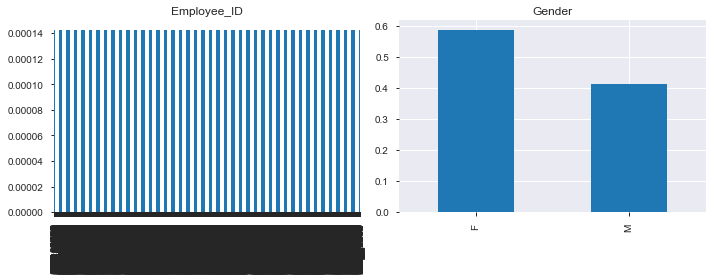

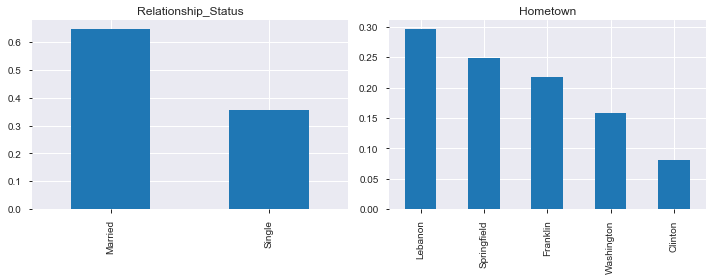

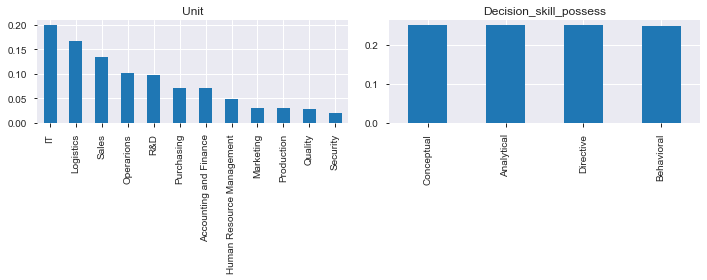

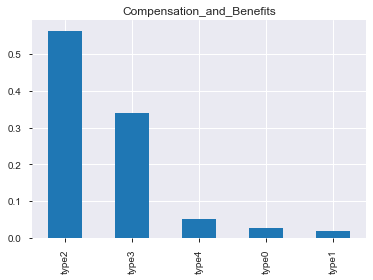

In [18]:
# Function to perform univariate analysis of categorical columns
def plot_categorical_columns(dataframe):
    categorical_columns = dataframe.select_dtypes(include=['object']).columns

    for i in range(0, len(categorical_columns), 2):
        if len(categorical_columns) > i + 1:

            plt.figure(figsize=(10, 4))
            plt.subplot(121)
            dataframe[categorical_columns[i]].value_counts(
                normalize=True).plot(kind='bar')
            plt.title(categorical_columns[i])
            plt.subplot(122)
            dataframe[categorical_columns[i + 1]].value_counts(
                normalize=True).plot(kind='bar')
            plt.title(categorical_columns[i + 1])
            plt.tight_layout()
            plt.show()

        else:
            dataframe[categorical_columns[i]].value_counts(
                normalize=True).plot(kind='bar')
            plt.title(categorical_columns[i])


plot = plot_categorical_columns(data_train)

#### Observations

From the above visuals we can make the following observations:

- Attrition cases  higher in Females than Males.
- Again attrition cases are higher in married than single.
- Most attrition observed in the hometown of Lebanon.
- Chances of high attrition are higher in IT, Logistics and Sales.
- Employees with compensation and benefits category type 2 show most attritions.

In [19]:
# Function to detect outliers in every feature
def detect_outliers(dataframe):
    cols = list(dataframe)
    outliers = pd.DataFrame(columns=['Feature', 'Number of Outliers'])

    for column in cols:
        if column in dataframe.select_dtypes(include=np.number).columns:
            # first quartile (Q1)
            q1 = dataframe[column].quantile(0.25)

            # third quartile (Q3)
            q3 = dataframe[column].quantile(0.75)

            # IQR
            iqr = q3 - q1

            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature': column, 'Number of Outliers': dataframe.loc[(
                dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0]}, ignore_index=True)
    return outliers


detect_outliers(data_train)

Feature Number of Outliers
0                    Age                  0
1        Education_Level                695
2        Time_of_service                  8
3   Time_since_promotion                  0
4            growth_rate                  0
5            Travel_Rate                  0
6             Post_Level                698
7              Pay_Scale                  0
8      Work_Life_balance                  0
9                   VAR1               2807
10                  VAR2                  0
11                  VAR3                198
12                  VAR4               1853
13                  VAR5                222
14                  VAR6                  0
15                  VAR7                287
16        Attrition_rate                602

In [20]:
detect_outliers(data_test)

Feature Number of Outliers
0                    Age                  0
1        Education_Level                284
2        Time_of_service                  1
3   Time_since_promotion                  0
4            growth_rate                  0
5            Travel_Rate                  0
6             Post_Level                  0
7              Pay_Scale                  0
8      Work_Life_balance                  0
9                   VAR1               1168
10                  VAR2                  0
11                  VAR3                 88
12                  VAR4                824
13                  VAR5                 99
14                  VAR6                  0
15                  VAR7                125

- We are not going to treat any outliers in train or test data as for all columns are represented in a range like Education level in range 1 to 5.

### Univariate analysis of Continuous columns

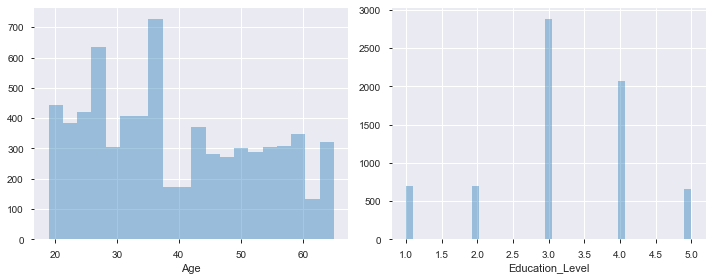

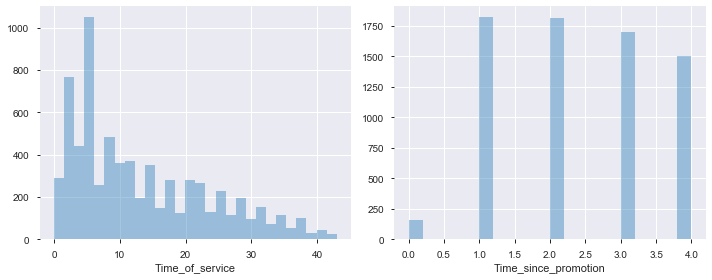

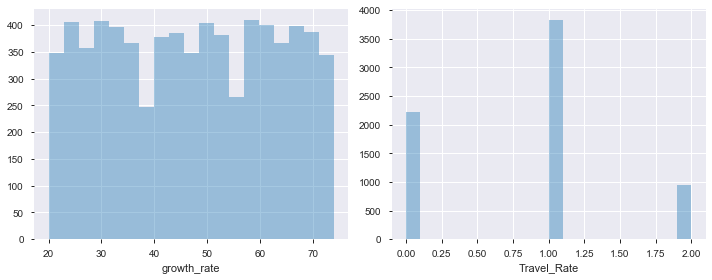

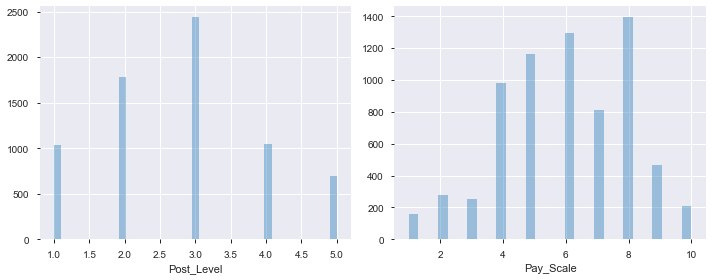

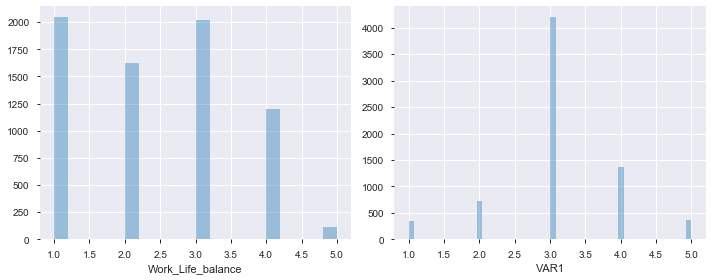

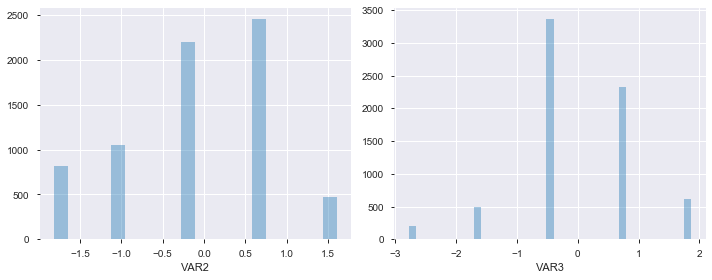

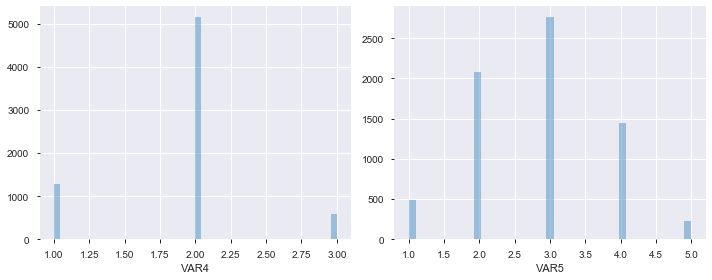

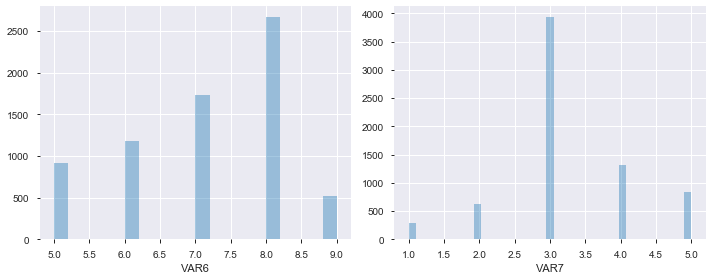

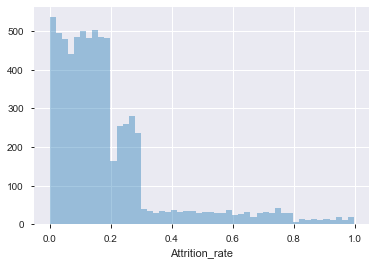

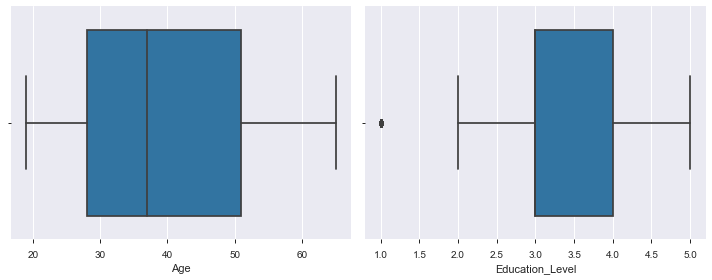

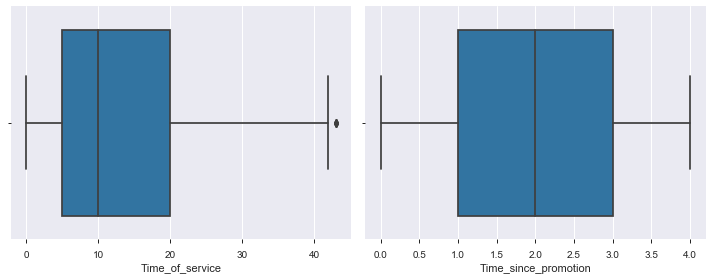

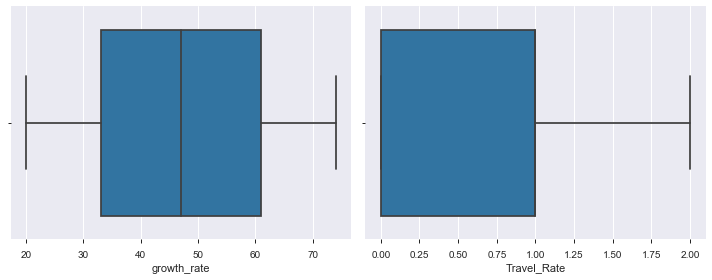

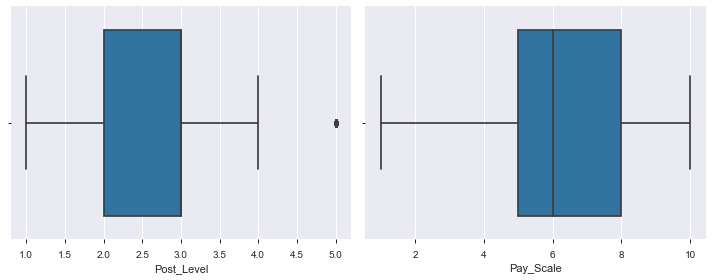

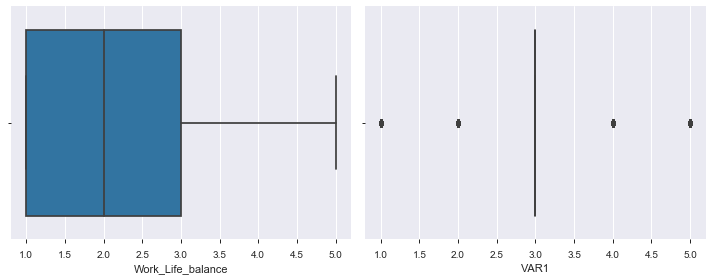

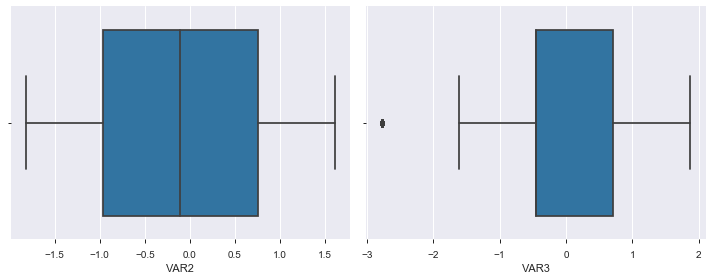

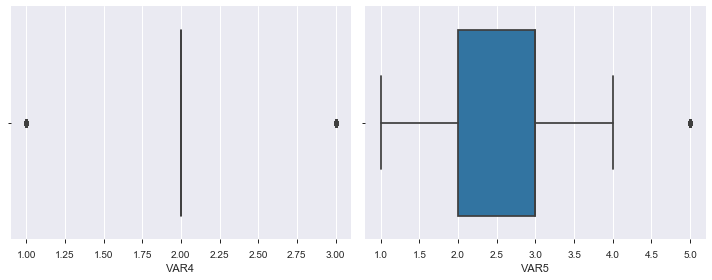

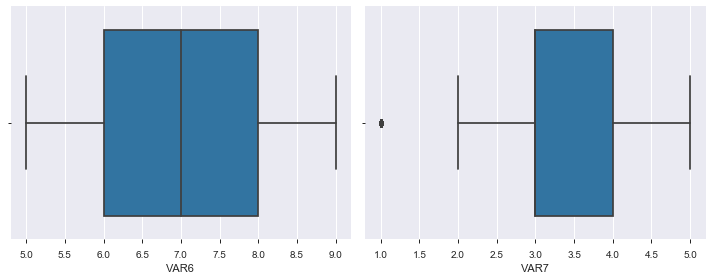

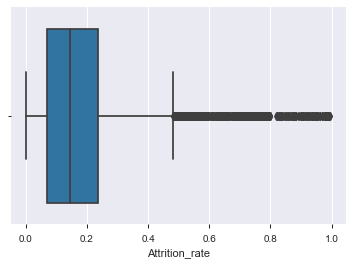

In [21]:
# Function to plot histograms
def plot_continuous_columns(dataframe):
    numeric_columns = dataframe.select_dtypes(
        include=['number']).columns.tolist()
    dataframe = dataframe[numeric_columns]

    for i in range(0, len(numeric_columns), 2):
        if len(numeric_columns) > i + 1:
            plt.figure(figsize=(10, 4))
            plt.subplot(121)
            sns.distplot(dataframe[numeric_columns[i]], kde=False)
            plt.subplot(122)
            sns.distplot(dataframe[numeric_columns[i + 1]], kde=False)
            plt.tight_layout()
            plt.show()

        else:
            sns.distplot(dataframe[numeric_columns[i]], kde=False)


# Function to plot boxplots


def plot_box_plots(dataframe):
    numeric_columns = dataframe.select_dtypes(
        include=['number']).columns.tolist()
    dataframe = dataframe[numeric_columns]

    for i in range(0, len(numeric_columns), 2):
        if len(numeric_columns) > i + 1:
            plt.figure(figsize=(10, 4))
            plt.subplot(121)
            sns.boxplot(dataframe[numeric_columns[i]])
            plt.subplot(122)
            sns.boxplot(dataframe[numeric_columns[i + 1]])
            plt.tight_layout()
            plt.show()

        else:
            sns.boxplot(dataframe[numeric_columns[i]])


plot_continuous_columns(data_train)
plot_box_plots(data_train)

- Age column has more number of attritions in the young age group. This particular column can be binned in different ranges.
- Time_of_Service shows a positive skewness.
- Education_level 3 has more number in attritions.
- Target column attrition_rate also shows postive skewness.

In [22]:
data_train['Age_range'] = pd.cut(x=data_train['Age'], bins=[18.0, 40.0, 85.0])
data_train.head()

Employee_ID Gender   Age  Education_Level Relationship_Status     Hometown  \
0   EID_23371      F  42.0              4.0             Married     Franklin   
1   EID_18000      M  24.0              3.0              Single  Springfield   
2    EID_3891      F  58.0              3.0             Married      Clinton   
3   EID_17492      F  26.0              3.0              Single      Lebanon   
4   EID_22534      F  31.0              1.0             Married  Springfield   

                        Unit Decision_skill_possess  Time_of_service  \
0                         IT             Conceptual              4.0   
1                  Logistics             Analytical              5.0   
2                    Quality             Conceptual             27.0   
3  Human Resource Management             Behavioral              4.0   
4                  Logistics             Conceptual              5.0   

   Time_since_promotion  growth_rate  Travel_Rate  Post_Level  Pay_Scale  \
0                   4.0         33.0          1.0         1.0        7.0   
1                   4.0         36.0          0.0         3.0        6.0   
2                   3.0         51.0          0.0         2.0        8.0   
3                   3.0         56.0          1.0         3.0        8.0   
4                   4.0         62.0          1.0         3.0        2.0   

  Compensation_and_Benefits  Work_Life_balance  VAR1    VAR2    VAR3  VAR4  \
0                     type2                3.0   4.0  0.7516  1.8688   2.0   
1                     type2                4.0   3.0 -0.9612 -0.4537   2.0   
2                     type2                1.0   4.0 -0.9612 -0.4537   3.0   
3                     type2                1.0   3.0 -1.8176 -0.4537   2.0   
4                     type3                3.0   1.0  0.7516 -0.4537   2.0   

   VAR5  VAR6  VAR7  Attrition_rate     Age_range  
0   4.0   5.0   3.0          0.1841  (40.0, 85.0]  
1   3.0   5.0   3.0          0.0670  (18.0, 40.0]  
2   3.0   8.0   3.0          0.0851  (40.0, 85.0]  
3   3.0   7.0   3.0          0.0668  (18.0, 40.0]  
4   2.0   8.0   2.0          0.1827  (18.0, 40.0]

In [23]:
data_test['Age_range'] = pd.cut(x=data_test['Age'], bins=[18.0, 40.0, 85.0])
data_test.head()

Employee_ID Gender   Age  Education_Level Relationship_Status     Hometown  \
0   EID_22713      F  32.0              5.0              Single  Springfield   
1    EID_9658      M  65.0              2.0              Single      Lebanon   
2   EID_22203      M  52.0              3.0             Married  Springfield   
3    EID_7652      M  50.0              5.0              Single   Washington   
4    EID_6516      F  44.0              3.0             Married     Franklin   

        Unit Decision_skill_possess  Time_of_service  Time_since_promotion  \
0        R&D             Conceptual              7.0                   4.0   
1         IT              Directive             41.0                   2.0   
2      Sales              Directive             21.0                   3.0   
3  Marketing             Analytical             11.0                   4.0   
4        R&D             Conceptual             12.0                   4.0   

   growth_rate  Travel_Rate  Post_Level  Pay_Scale Compensation_and_Benefits  \
0         30.0          1.0         5.0        4.0                     type2   
1         72.0          1.0         1.0        1.0                     type2   
2         25.0          0.0         1.0        8.0                     type3   
3         28.0          1.0         1.0        2.0                     type0   
4         47.0          1.0         3.0        2.0                     type2   

   Work_Life_balance  VAR1    VAR2    VAR3  VAR4  VAR5  VAR6  VAR7  \
0                1.0   3.0 -0.9612 -0.4537   2.0   1.0   8.0   4.0   
1                1.0   4.0 -0.9612  0.7075   1.0   2.0   8.0   2.0   
2                1.0   4.0 -0.1048  0.7075   2.0   1.0   9.0   3.0   
3                4.0   3.0 -0.1048  0.7075   2.0   2.0   8.0   3.0   
4                4.0   4.0  1.6081  0.7075   2.0   2.0   7.0   4.0   

      Age_range  
0  (18.0, 40.0]  
1  (40.0, 85.0]  
2  (40.0, 85.0]  
3  (40.0, 85.0]  
4  (40.0, 85.0]

In [24]:
data_train['growth_rate_range'] = pd.cut(x=data_train['growth_rate'], bins=[15.0, 35.0, 80.0])
data_train.head()

Employee_ID Gender   Age  Education_Level Relationship_Status     Hometown  \
0   EID_23371      F  42.0              4.0             Married     Franklin   
1   EID_18000      M  24.0              3.0              Single  Springfield   
2    EID_3891      F  58.0              3.0             Married      Clinton   
3   EID_17492      F  26.0              3.0              Single      Lebanon   
4   EID_22534      F  31.0              1.0             Married  Springfield   

                        Unit Decision_skill_possess  Time_of_service  \
0                         IT             Conceptual              4.0   
1                  Logistics             Analytical              5.0   
2                    Quality             Conceptual             27.0   
3  Human Resource Management             Behavioral              4.0   
4                  Logistics             Conceptual              5.0   

   Time_since_promotion  growth_rate  Travel_Rate  Post_Level  Pay_Scale  \
0                   4.0         33.0          1.0         1.0        7.0   
1                   4.0         36.0          0.0         3.0        6.0   
2                   3.0         51.0          0.0         2.0        8.0   
3                   3.0         56.0          1.0         3.0        8.0   
4                   4.0         62.0          1.0         3.0        2.0   

  Compensation_and_Benefits  Work_Life_balance  VAR1    VAR2    VAR3  VAR4  \
0                     type2                3.0   4.0  0.7516  1.8688   2.0   
1                     type2                4.0   3.0 -0.9612 -0.4537   2.0   
2                     type2                1.0   4.0 -0.9612 -0.4537   3.0   
3                     type2                1.0   3.0 -1.8176 -0.4537   2.0   
4                     type3                3.0   1.0  0.7516 -0.4537   2.0   

   VAR5  VAR6  VAR7  Attrition_rate     Age_range growth_rate_range  
0   4.0   5.0   3.0          0.1841  (40.0, 85.0]      (15.0, 35.0]  
1   3.0   5.0   3.0          0.0670  (18.0, 40.0]      (35.0, 80.0]  
2   3.0   8.0   3.0          0.0851  (40.0, 85.0]      (35.0, 80.0]  
3   3.0   7.0   3.0          0.0668  (18.0, 40.0]      (35.0, 80.0]  
4   2.0   8.0   2.0          0.1827  (18.0, 40.0]      (35.0, 80.0]

In [25]:
data_test['growth_rate_range'] = pd.cut(x=data_test['growth_rate'], bins=[15.0, 35.0, 80.0])
data_test.head()

Employee_ID Gender   Age  Education_Level Relationship_Status     Hometown  \
0   EID_22713      F  32.0              5.0              Single  Springfield   
1    EID_9658      M  65.0              2.0              Single      Lebanon   
2   EID_22203      M  52.0              3.0             Married  Springfield   
3    EID_7652      M  50.0              5.0              Single   Washington   
4    EID_6516      F  44.0              3.0             Married     Franklin   

        Unit Decision_skill_possess  Time_of_service  Time_since_promotion  \
0        R&D             Conceptual              7.0                   4.0   
1         IT              Directive             41.0                   2.0   
2      Sales              Directive             21.0                   3.0   
3  Marketing             Analytical             11.0                   4.0   
4        R&D             Conceptual             12.0                   4.0   

   growth_rate  Travel_Rate  Post_Level  Pay_Scale Compensation_and_Benefits  \
0         30.0          1.0         5.0        4.0                     type2   
1         72.0          1.0         1.0        1.0                     type2   
2         25.0          0.0         1.0        8.0                     type3   
3         28.0          1.0         1.0        2.0                     type0   
4         47.0          1.0         3.0        2.0                     type2   

   Work_Life_balance  VAR1    VAR2    VAR3  VAR4  VAR5  VAR6  VAR7  \
0                1.0   3.0 -0.9612 -0.4537   2.0   1.0   8.0   4.0   
1                1.0   4.0 -0.9612  0.7075   1.0   2.0   8.0   2.0   
2                1.0   4.0 -0.1048  0.7075   2.0   1.0   9.0   3.0   
3                4.0   3.0 -0.1048  0.7075   2.0   2.0   8.0   3.0   
4                4.0   4.0  1.6081  0.7075   2.0   2.0   7.0   4.0   

      Age_range growth_rate_range  
0  (18.0, 40.0]      (15.0, 35.0]  
1  (40.0, 85.0]      (35.0, 80.0]  
2  (40.0, 85.0]      (15.0, 35.0]  
3  (40.0, 85.0]      (15.0, 35.0]  
4  (40.0, 85.0]      (35.0, 80.0]

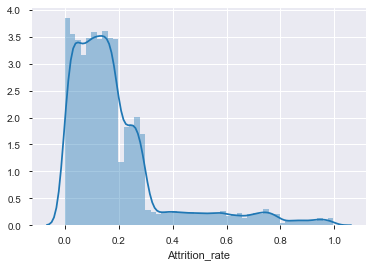

In [26]:
sns.distplot(data_train['Attrition_rate'])

In [27]:
#skewness and kurtosis
print("Skewness: %f" % data_train['Attrition_rate'].skew())
print("Kurtosis: %f" % data_train['Attrition_rate'].kurt())

Skewness: 2.056876
Kurtosis: 4.410104


#### Observations


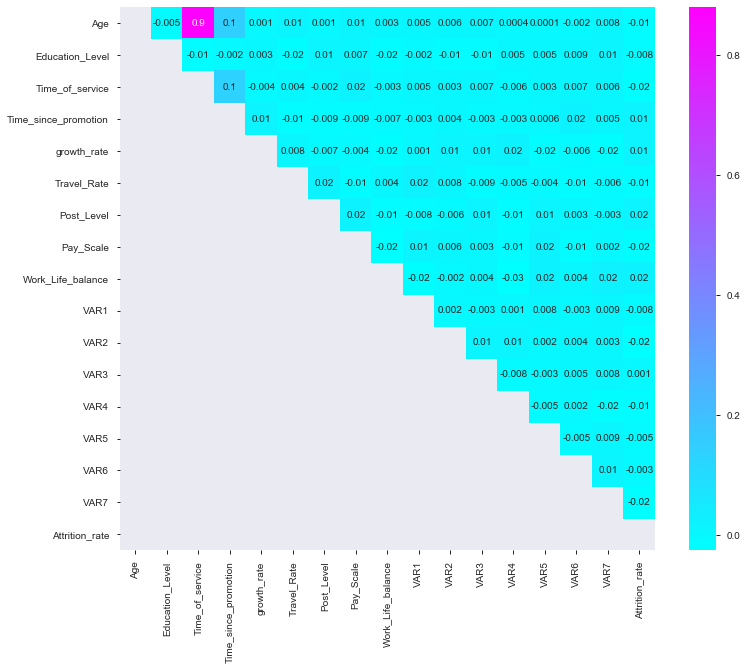

In [28]:
# Creating a correlation heatmap for training data
plt.figure(figsize=(12, 10))
cor = data_train.corr()
mask = np.tril(cor)
sns.heatmap(cor, fmt='.1g', annot=True, cmap='cool', mask=mask)

- Age and Time of Service are higly correlated and we have to drop one of the columns.

In [29]:
# Observing the correlation of the attributes with the target
cor_target = abs(cor["Attrition_rate"])
cor_target

Age                     0.014760
Education_Level         0.008143
Time_of_service         0.017203
Time_since_promotion    0.013880
growth_rate             0.014247
Travel_Rate             0.012608
Post_Level              0.016402
Pay_Scale               0.015221
Work_Life_balance       0.020809
VAR1                    0.008073
VAR2                    0.022751
VAR3                    0.001245
VAR4                    0.013364
VAR5                    0.004770
VAR6                    0.003130
VAR7                    0.015299
Attrition_rate          1.000000
Name: Attrition_rate, dtype: float64

- None of the columns here show a high correlation to our target.

- We can drop the column Time_of_service since it is highly correlated with AGE and also we can drop AGE and growth_rate as we have created two new columns.

In [30]:
data_train = data_train.drop(['Time_of_service', 'Employee_ID', 'Age', 'growth_rate'], 1)
data_test = data_test.drop(['Time_of_service', 'Age', 'growth_rate'], 1)

In [31]:
# Function that auto encodes any dataframe column of type category or object.


def dummyEncode(dataset):

    columnsToEncode = list(
        dataset.select_dtypes(include=['category','object']))
    le = LabelEncoder()
    for feature in columnsToEncode:
        try:
            dataset[feature] = le.fit_transform(dataset[feature])
        except:
            print('Error encoding ' + feature)
    return dataset


data_train = dummyEncode(data_train)

In [32]:
data_train.head()

Gender  Education_Level  Relationship_Status  Hometown  Unit  \
0       0              4.0                    0         1     2   
1       1              3.0                    1         3     3   
2       0              3.0                    0         0     8   
3       0              3.0                    1         2     1   
4       0              1.0                    0         3     3   

   Decision_skill_possess  Time_since_promotion  Travel_Rate  Post_Level  \
0                       2                   4.0          1.0         1.0   
1                       0                   4.0          0.0         3.0   
2                       2                   3.0          0.0         2.0   
3                       1                   3.0          1.0         3.0   
4                       2                   4.0          1.0         3.0   

   Pay_Scale  Compensation_and_Benefits  Work_Life_balance  VAR1    VAR2  \
0        7.0                          2                3.0   4.0  0.7516   
1        6.0                          2                4.0   3.0 -0.9612   
2        8.0                          2                1.0   4.0 -0.9612   
3        8.0                          2                1.0   3.0 -1.8176   
4        2.0                          3                3.0   1.0  0.7516   

     VAR3  VAR4  VAR5  VAR6  VAR7  Attrition_rate  Age_range  \
0  1.8688   2.0   4.0   5.0   3.0          0.1841          1   
1 -0.4537   2.0   3.0   5.0   3.0          0.0670          0   
2 -0.4537   3.0   3.0   8.0   3.0          0.0851          1   
3 -0.4537   2.0   3.0   7.0   3.0          0.0668          0   
4 -0.4537   2.0   2.0   8.0   2.0          0.1827          0   

   growth_rate_range  
0                  0  
1                  1  
2                  1  
3                  1  
4                  1

In [33]:
le = LabelEncoder()
data_test['Gender'] = le.fit_transform(data_test['Gender'])
data_test['Relationship_Status'] = le.fit_transform(data_test['Relationship_Status'])
data_test['Hometown'] = le.fit_transform(data_test['Hometown'])
data_test['Unit'] = le.fit_transform(data_test['Unit'])
data_test['Decision_skill_possess'] = le.fit_transform(data_test['Decision_skill_possess'])
data_test['Compensation_and_Benefits'] = le.fit_transform(data_test['Compensation_and_Benefits'])
data_test.head()

Employee_ID  Gender  Education_Level  Relationship_Status  Hometown  Unit  \
0   EID_22713       0              5.0                    1         3     9   
1    EID_9658       1              2.0                    1         2     2   
2   EID_22203       1              3.0                    0         3    10   
3    EID_7652       1              5.0                    1         4     4   
4    EID_6516       0              3.0                    0         1     9   

   Decision_skill_possess  Time_since_promotion  Travel_Rate  Post_Level  \
0                       2                   4.0          1.0         5.0   
1                       3                   2.0          1.0         1.0   
2                       3                   3.0          0.0         1.0   
3                       0                   4.0          1.0         1.0   
4                       2                   4.0          1.0         3.0   

   Pay_Scale  Compensation_and_Benefits  Work_Life_balance  VAR1    VAR2  \
0        4.0                          2                1.0   3.0 -0.9612   
1        1.0                          2                1.0   4.0 -0.9612   
2        8.0                          3                1.0   4.0 -0.1048   
3        2.0                          0                4.0   3.0 -0.1048   
4        2.0                          2                4.0   4.0  1.6081   

     VAR3  VAR4  VAR5  VAR6  VAR7     Age_range growth_rate_range  
0 -0.4537   2.0   1.0   8.0   4.0  (18.0, 40.0]      (15.0, 35.0]  
1  0.7075   1.0   2.0   8.0   2.0  (40.0, 85.0]      (35.0, 80.0]  
2  0.7075   2.0   1.0   9.0   3.0  (40.0, 85.0]      (15.0, 35.0]  
3  0.7075   2.0   2.0   8.0   3.0  (40.0, 85.0]      (15.0, 35.0]  
4  0.7075   2.0   2.0   7.0   4.0  (40.0, 85.0]      (35.0, 80.0]

In [34]:
data_test['Age_range'] = le.fit_transform(data_test['Age_range'])
data_test['growth_rate_range'] = le.fit_transform(data_test['growth_rate_range'])

In [35]:
import xgboost as xgb

In [37]:
def run_model(predictors, target, model):
    '''
    Performs model training and tests using rmse
    returns rme
    '''
    x_train, x_test, y_train, y_test = train_test_split(predictors,
                                                        target,
                                                        test_size=0.2,
                                                        random_state=42)
    sc = StandardScaler()
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    score = 100 * max(0,1 - rmse)

    return score


# Predictors
X = data_train.drop(['Attrition_rate'], 1)

# Target
y = data_train['Attrition_rate']

# Choosing the models.
model_lr = LinearRegression()

run_model(X, y, model_lr)

81.33764450042216

In [38]:
model_l1 = Lasso(random_state=42)
run_model(X, y, model_l1)

81.34189412077254

In [39]:
model_l2 = Ridge(random_state=42)
run_model(X, y, model_l2)

81.33765497820619

In [40]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
model_p = make_pipeline(PolynomialFeatures(2), LinearRegression())
run_model(X, y, model_p)

80.99502091593371

In [41]:
model_dt = DecisionTreeRegressor(random_state=42)
run_model(X, y, model_dt)

71.96717020298216

In [42]:
model_rf = RandomForestRegressor(random_state=42)
run_model(X, y, model_rf)

80.8943032860473

In [43]:
model_el = ElasticNet(random_state=42)
run_model(X, y, model_el)

81.34189412077254

In [44]:
model_gb = GradientBoostingRegressor(random_state=42)
run_model(X, y, model_gb)

81.22893265756446

In [45]:
model_xgb = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
run_model(X, y, model_xgb)

79.54387118845592

In [46]:
lasso_lambdas = [
    0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3,
    0.6, 1
]
lasso_grid = GridSearchCV(estimator=model_l1,
                          param_grid=dict(alpha=lasso_lambdas))
run_model(X, y, lasso_grid)

81.34189412077254

In [47]:
lasso_grid.best_params_

{'alpha': 0.01}

In [48]:
lasso_grid.best_score_

-0.0025770153511811334

In [49]:
ridge_lambdas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60]
ridge_grid = GridSearchCV(estimator=model_l2,
                          param_grid=dict(alpha=ridge_lambdas))
run_model(X, y, ridge_grid)

81.33826041943557

In [50]:
ridge_grid.best_params_

{'alpha': 60}

In [51]:
ridge_grid.best_score_

-0.006883058551510635

## FEATURE SELECTION

In [52]:
def feature_selection(predictors,target,number_of_features,model):

    models = model()
    rfe = RFE(models,number_of_features)
    rfe = rfe.fit(X,y)
    feature_ranking = pd.Series(rfe.ranking_, index=X.columns)
    plt.show()
    print('Features  to be selected for {} are:'.format(str(i[0])))
    print(feature_ranking[feature_ranking.values==1].index.tolist())
    print('===='*30)

# Choosing the models. If you want to specify additional models, kindly specify them as a key-value pair as shown below.
models = {'Linear Regression':LinearRegression,'Lasso':Lasso,'Ridge': Ridge}

# Selecting 9 number of features
for i in models.items():
    feature_selection(X,y,21,i[1])
    

Features  to be selected for Linear Regression are:
['Gender', 'Education_Level', 'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess', 'Time_since_promotion', 'Travel_Rate', 'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits', 'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7', 'Age_range', 'growth_rate_range']
Features  to be selected for Lasso are:
['Gender', 'Education_Level', 'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess', 'Time_since_promotion', 'Travel_Rate', 'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits', 'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7', 'Age_range', 'growth_rate_range']
Features  to be selected for Ridge are:
['Gender', 'Education_Level', 'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess', 'Time_since_promotion', 'Travel_Rate', 'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits', 'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VA

In [53]:
lasso_lambdas = [
    0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3,
    0.6, 1
]
lasso_grid_rfe = GridSearchCV(estimator=model_l1,
                              param_grid=dict(alpha=lasso_lambdas))
run_model(
    X[[
        'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7', 'Age_range',
        'growth_rate_range'
    ]], y, lasso_grid_rfe)

81.34189412077254

In [54]:
lasso_grid_rfe.best_params_

{'alpha': 0.006}

In [55]:
ridge_lambdas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60]
ridge_grid_rfe = GridSearchCV(estimator=model_l2,
                              param_grid=dict(alpha=ridge_lambdas))
run_model(
    X[[
        'Gender', 'Relationship_Status', 'Travel_Rate',
        'Compensation_and_Benefits', 'VAR1', 'VAR3', 'VAR4', 'Age_range',
        'growth_rate_range'
    ]], y, ridge_grid_rfe)

81.35897516147372

In [56]:
ridge_grid_rfe.best_params_

{'alpha': 60}

In [57]:
X_train_n = data_train.drop([
    'Attrition_rate', 'Education_Level', 'Unit', 'Pay_Scale', 'VAR2', 'VAR5',
    'VAR6', 'VAR7', 'Hometown', 'Decision_skill_possess',
    'Time_since_promotion', 'Post_Level', 'Work_Life_balance'
], 1)
y_train_n = data_train['Attrition_rate']
X_test_n = data_test.drop([
    'Employee_ID', 'Education_Level', 'Unit', 'Pay_Scale', 'VAR2', 'VAR5',
    'VAR6', 'Education_Level', 'Unit', 'Pay_Scale', 'VAR2', 'VAR5', 'VAR6',
    'VAR7', 'Hometown', 'Decision_skill_possess', 'Time_since_promotion',
    'Post_Level', 'Work_Life_balance'
], 1)
X_train_n.shape, y_train_n.shape, X_test_n.shape

((7000, 9), (7000,), (3000, 9))

In [58]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train_n)
X_test = sc.transform(X_test_n)
ridge_model = Ridge(alpha=60, random_state=42)
ridge_model.fit(X_train, y_train_n)
y_pred = ridge_model.predict(X_test)

In [59]:
submission = pd.DataFrame({
    "Employee_ID": data_test["Employee_ID"],
    "Attrition_rate": y_pred
})
submission.to_csv(
    r'C:\Users\sumir\Downloads\HackerEarth_MachineLearning\sample_submission.csv',
    index=False)